# A/B Testing

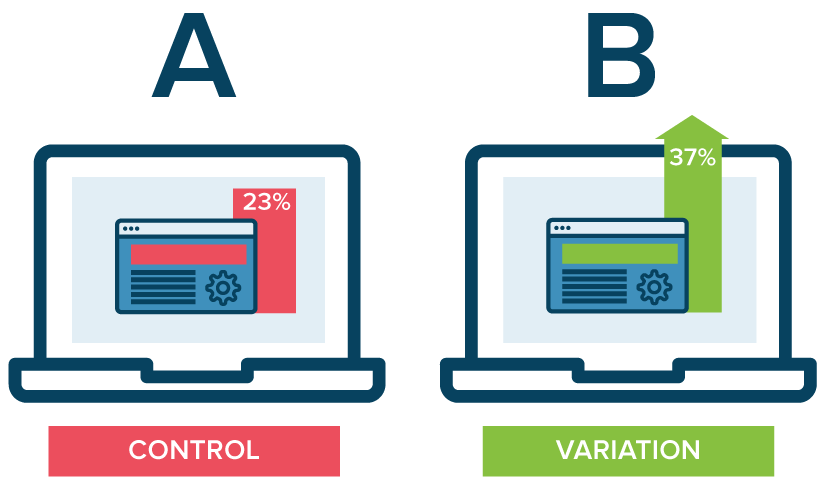

## Learning Goal

- Understand what is A/B testing?
- How A/B testing is carried out.
- How it is used in industry?
- Run a simple example. 

### What is A/B Testing?
- A/B testing is when you run a test by creating multiple versions of a page, each with its own URL. When users try to access the original URL, you redirect some of them to each of the variation URLs and then compare users’ behaviour to see which page is most effective.

- Multivariate testing is when you use software to change differents parts of your website on the fly. You can test changes to multiple parts of a page—say, the heading, a photo, and the ‘Add to Cart’ button—and the software will show variations of each of these sections to users in different combinations and then statistically analyze which variations are the most effective. Only one URL is involved; the variations are inserted dynamically on the page.

## Activation

- https://hbr.org/2017/06/a-refresher-on-ab-testing

## A/B Testing Process

The following is an A/B testing framework you can use to start running tests:

- Collect Data: Your analytics will often provide insight into where you can begin optimizing. It helps to begin with high traffic areas of your site or app, as that will allow you to gather data faster. Look for pages with low conversion rates or high drop-off rates that can be improved.

- Identify Goals: Your conversion goals are the metrics that you are using to determine whether or not the variation is more successful than the original version. Goals can be anything from clicking a button or link to product purchases and e-mail signups.

- Generate Hypothesis: Once you've identified a goal you can begin generating A/B testing ideas and hypotheses for why you think they will be better than the current version. Once you have a list of ideas, prioritize them in terms of expected impact and difficulty of implementation.

- Create Variations: Using your A/B testing software, make the desired changes to an element of your website or mobile app experience. This might be changing the color of a button, swapping the order of elements on the page, hiding navigation elements, or something entirely custom. Many leading A/B testing tools have a visual editor that will make these changes easy. Make sure to QA your experiment to make sure it works as expected.

- Run Experiment: Kick off your experiment and wait for visitors to participate! At this point, visitors to your site or app will be randomly assigned to either the control or variation of your experience. Their interaction with each experience is measured, counted, and compared to determine how each performs.

- Analyze Results: Once your experiment is complete, it's time to analyze the results. Your A/B testing software will present the data from the experiment and show you the difference between how the two versions of your page performed, and whether there is a statistically significant difference.

from https://www.optimizely.com/optimization-glossary/ab-testing/

## A/B Testing Example
- Thanks Andy and DC crew!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
from scipy import stats
from statsmodels.stats.power import TTestIndPower

warnings.filterwarnings("ignore")
np.random.seed(10)

In [ ]:
experiment = pd.read_csv('ig_experiment.csv')
control = pd.read_csv('ig_control.csv')

In [ ]:
experiment.head()

In [ ]:
control.head()

#### Solve for sample size

We can use `TTestIndPower.solve_power` from `statsmodels` to find the sample size you need.

[documentation here](https://www.statsmodels.org/dev/generated/statsmodels.stats.power.tt_ind_solve_power.html)

In [ ]:
# before we even start the experiment, we want to know in order to attain a power of .8 given an alpha of .05,
# how many observations we need 
effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)
sample_size

In [ ]:
print(experiment.shape)
print(control.shape)

Luckily, we do have enough observations to conduct this experiment!

In [ ]:
# conducting a T Test
stats.ttest_ind(experiment['Likes_Given_Exp'],control['Likes_Given_Con'])

In [ ]:
sns.kdeplot(experiment['Likes_Given_Exp'], shade = True)
sns.kdeplot(control['Likes_Given_Con'], shade = True)

Calculate the effect size 

In [ ]:
exp_mean = experiment['Likes_Given_Exp'].mean()
con_mean = control['Likes_Given_Con'].mean()

In [ ]:
def cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number

    diff = group1.mean() - group2.mean()

    n1 = len(group1)
    n2 = len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = ((n1-1) * var1 + (n2-1) * var2) / (n1 + n2 - 1 - 1)

    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)

    return d

In [ ]:
cohen_d(experiment['Likes_Given_Exp'], control['Likes_Given_Con'])

## A/B Testing in Industry

- A **media company** might want to increase readership, increase the amount of time readers spend on their site, and amplify their articles with social sharing. To achieve these goals, they might test variations on:

    + Email sign-up models  
    + Recommended content  
    + Social sharing buttons  
    
- A **travel company** may want to increase the number of successful bookings are completed on their website or mobile app, or may want to increase revenue from ancillary purchases. To improve these metrics, they may test variations of:

    + Homepage search models
    + Search results page
    + Ancillary product presentation

- An **e-commerce company** might want to increase the number of completed checkouts, the average order value, or increase holiday sales. To accomplish this, they may A/B test:

    + Homepage promotions
    + Navigation elements
    + Checkout funnel components
    
- A **technology company** might want to increase the number of high-quality leads for their sales team, increase the number of free trial users, or attract a specific type of buyer. They might test:

    + Lead form components
    + Free trial signup flow
    <li>Homepage messaging and <a href="https://www.optimizely.com/optimization-glossary/call-to-action/">call-to-action</a></li>
